In [11]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn import datasets
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

# Load the iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Entrenamos el clasificador

In [12]:
# Usar SVC como clasificador base
base_classifier = SVC(kernel='linear', probability=True)

# Crear el clasificador One-vs-All
ova_classifier = OneVsRestClassifier(base_classifier)

# Entrenar el clasificador
ova_classifier.fit(X_train, y_train)

OneVsRestClassifier(estimator=SVC(kernel='linear', probability=True))

División del dataset

In [17]:
import pandas as pd
from sklearn.datasets import load_iris
import numpy as np

# Cargar el dataset de iris como ejemplo
data = load_iris()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name='target')

# Combinar las características y la etiqueta en un solo DataFrame
dataset = pd.concat([X, y], axis=1)

# Crear datasets One vs All
def create_one_vs_all_datasets(dataset, target_column):
    unique_classes = dataset[target_column].unique()
    one_vs_all_datasets = {}

    for cls in unique_classes:
        binary_target = (dataset[target_column] == cls).astype(int)
        one_vs_all_datasets[cls] = pd.concat([dataset.drop(columns=target_column), binary_target.rename('binary_target')], axis=1)

    return one_vs_all_datasets

one_vs_all_datasets = create_one_vs_all_datasets(dataset, 'target')

# Mostrar los datos para cada clase
for cls, df in one_vs_all_datasets.items():
    print(f"Clase {cls} vs All")
    print(df.head(), '\n')


Clase 0 vs All
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   binary_target  
0              1  
1              1  
2              1  
3              1  
4              1   

Clase 1 vs All
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5      

Evaluamos el modelo

In [13]:
# Hacer predicciones
y_pred = ova_classifier.predict(X_test)

# Evaluar el rendimiento del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Mostrar un informe de clasificación
print(classification_report(y_test, y_pred))


Accuracy: 0.97
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.92      0.96        13
           2       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



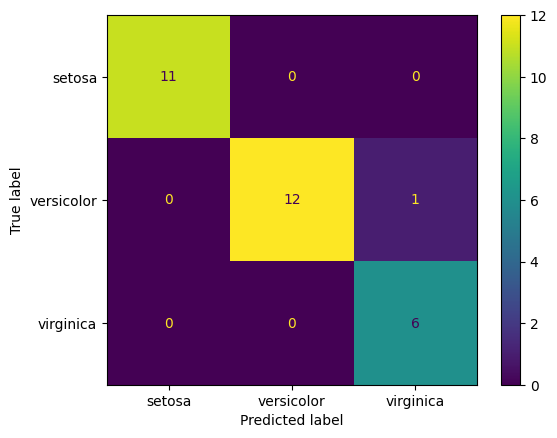

In [15]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=iris.target_names)
disp.plot()